# Exploratory Data Analysis

 - wind forecast and wind power from __2009/07/01 to 2011/01/01__, the initial train phase
 - wind forecast and wind power on 36 hours phases between each of the 157 test periods on which you can retrain you models

In [2]:
import pandas as pd
import seaborn as sns
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
pd.options.mode.chained_assignment = None  # default='warn'

In [3]:
training_data_1 = pd.read_csv("Data/Initial/train.csv")
# testing_data_1 = pd.read_csv("Data/Initial/test.csv")

wp_1_forecast = pd.read_csv("Data/Initial/wp1.csv")
wp_2_forecast = pd.read_csv("Data/Initial/wp2.csv")
wp_3_forecast = pd.read_csv("Data/Initial/wp3.csv")
wp_4_forecast = pd.read_csv("Data/Initial/wp4.csv")
wp_5_forecast = pd.read_csv("Data/Initial/wp5.csv")
wp_6_forecast = pd.read_csv("Data/Initial/wp6.csv")

Pour limiter mon training set j'utilise l'heure du forecast et non les heures prédites par le forecast afin de ne pas utiliser des données dans le future tout en conservant celles du future qui ont été prédites dans le passé. Par contre pour le testing data j'utilise les dates des heures prédites afin d'avoir les 4 forecast 36h précedant les premières heures de prédiction.

In [4]:
test_36h_start = '2010-12-30 12:00:00'
test_start_date = '2011-01-01 00:00:00'
test_end_date = '2012-06-25 00:00:00'

test_second_48 = '2011-01-03 01:00:00'

# Functions

In [5]:
def integer2date(s):
    s = str(s)
    return  datetime(year=int(s[0:4]), month=int(s[4:6]), day=int(s[6:8]), hour=int(s[8:]))

def adding_hours(h):
    return timedelta(hours = h)

def date_conversion(df):
    df['forecast_time'] = df.date.apply(lambda x: integer2date(x))
    df['hours_added'] = df.hors.apply(lambda x: adding_hours(x))
    df['date'] = df['forecast_time'] + df['hours_added']
    df = df.drop(['hours_added', 'hors'], axis = 1)
    return df

In [6]:
d = integer2date(2011010100) - timedelta(hours=36)
print(d)

2010-12-30 12:00:00


# Training data 

In [7]:
training_data_1['date'] = training_data_1.date.apply(lambda x: integer2date(x))

In [8]:
# training_data_test = training_data_1[(training_data_1.date >= test_start_date) & (training_data_1.date <= test_end_date)].head(48)
# training_data_test.groupby([training_data_test["date"].dt.year, training_data_test["date"].dt.month, training_data_test["date"].dt.day,  training_data_test["date"].dt.hour]).count().plot(kind="bar", figsize=(40,5))

# Testing data

- 48h to predict separated from 36h

In [9]:
# testing_data_1['date'] = testing_data_1.date.apply(lambda x: integer2date(x))
# testing_data_1 = testing_data_1.head(48)

In [10]:
# testing_data_1.groupby([testing_data_1["date"].dt.year, testing_data_1["date"].dt.month, testing_data_1["date"].dt.day,  testing_data_1["date"].dt.hour]).count().plot(kind="bar", figsize=(40,5))

# WP1 analysis et separation into training and testing data

Au vu de la répartition du temps, le mieux serait d'utiliser un modèle ML avec une matrice 48h en entrée et 48h en sorti. 

Dans le set de training, on a 1095 forecast de 48h complet. Le test commence au forecast 1099.0

To discuss: Est ce que forecast de la date du test peut être conservée si elle a été émise avant la date test ? (Selon moi oui, mais ce sera dommage d'être rejected pour ça)

In [11]:
# Defines batch of forecast
i = 1
for date in wp_1_forecast.date.unique():
    wp_1_forecast.loc[wp_1_forecast.date == date, 'cast'] = i
    i += 1

In [12]:
# Converts the date corresponding to the forcast and also the forecast date
wp_1_forecast = date_conversion(wp_1_forecast)
wp_1_forecast.tail(10)

,date,u,v,ws,wd,cast,forecast_time
104486,2012-06-24 15:00:00,3.94,4.13,5.71,43.62,2177.0,2012-06-23
104487,2012-06-24 16:00:00,4.53,3.49,5.72,52.41,2177.0,2012-06-23
104488,2012-06-24 17:00:00,4.54,2.91,5.39,57.31,2177.0,2012-06-23
104489,2012-06-24 18:00:00,4.13,2.63,4.90,57.50,2177.0,2012-06-23
104490,2012-06-24 19:00:00,3.47,2.72,4.41,51.88,2177.0,2012-06-23
104491,2012-06-24 20:00:00,2.69,2.66,3.79,45.36,2177.0,2012-06-23
104492,2012-06-24 21:00:00,1.94,1.77,2.63,47.65,2177.0,2012-06-23
104493,2012-06-24 22:00:00,1.35,-0.33,1.39,103.63,2177.0,2012-06-23
104494,2012-06-24 23:00:00,1.02,-2.87,3.05,160.40,2177.0,2012-06-23
104495,2012-06-25 00:00:00,1.06,-4.80,4.91,167.56,2177.0,2012-06-23


In [13]:
# Gets the right wind power value for each date of the dataset
wp_1_target = training_data_1[['date','wp1']]
for date in wp_1_target.date.unique():
     wp_1_forecast.loc[wp_1_forecast.date == date, 'wp1'] = wp_1_target.loc[wp_1_target.date == date, 'wp1'].values[0]
        
wp_1_forecast.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104496 entries, 0 to 104495
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   date           104496 non-null  datetime64[ns]
 1   u              93408 non-null   float64       
 2   v              93408 non-null   float64       
 3   ws             93408 non-null   float64       
 4   wd             93408 non-null   float64       
 5   cast           104496 non-null  float64       
 6   forecast_time  104496 non-null  datetime64[ns]
 7   wp1            74808 non-null   float64       
dtypes: datetime64[ns](2), float64(6)
memory usage: 6.4 MB


In [14]:
# # Use this to see the count of data (nice when you want to be sure you have 4 counts)
# wp_1_test_data = wp_1_forecast[(wp_1_forecast.date >= test_start_date)].sort_values(by='date').head(4*48+4*36)
# wp_1_test_data.groupby([wp_1_test_data["date"].dt.year, wp_1_test_data["date"].dt.month, wp_1_test_data["date"].dt.day,  wp_1_test_data["date"].dt.hour]).count().plot(kind="bar", figsize=(40,5))

In [15]:
wp_1_training = wp_1_forecast[(wp_1_forecast.forecast_time < test_start_date)]

In [16]:
wp_1_testing = wp_1_forecast[(wp_1_forecast.date >= test_36h_start)]

<AxesSubplot:xlabel='date,date,date,date'>

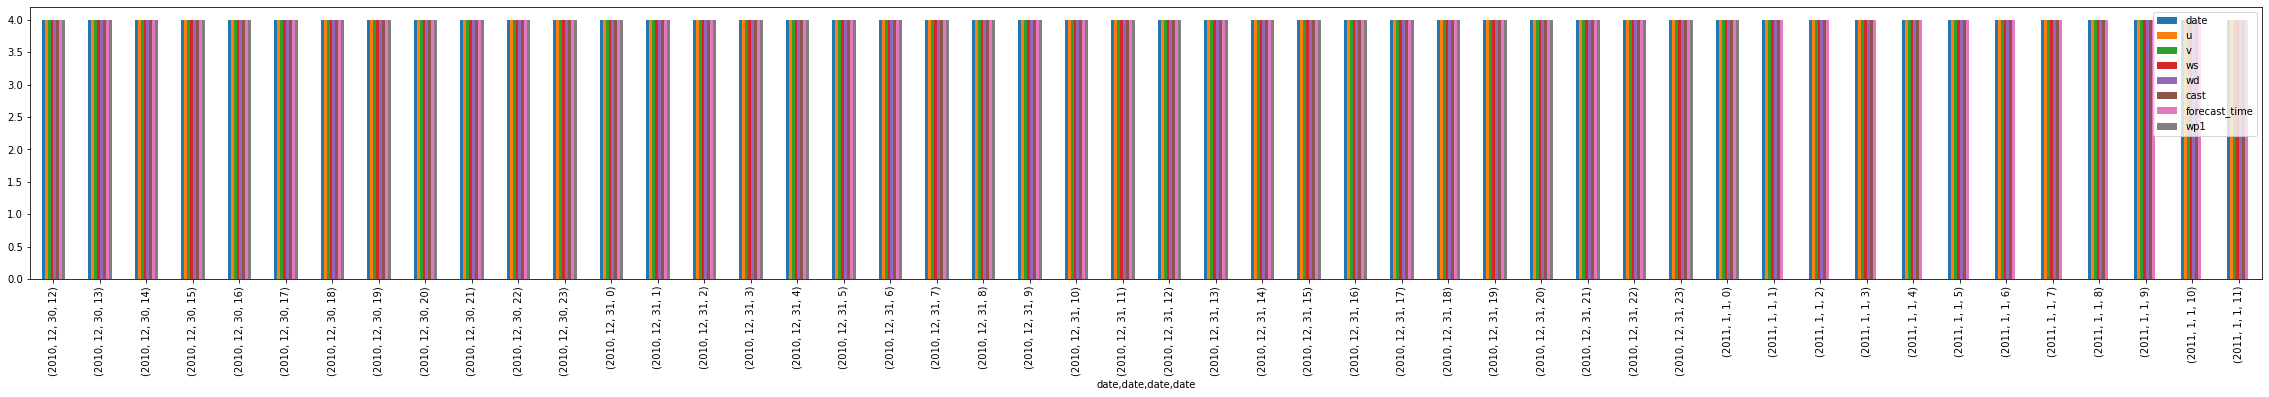

In [17]:
wp_1_test_data = wp_1_testing.sort_values(by='date').head(4*36+48)
wp_1_test_data.groupby([wp_1_test_data["date"].dt.year, wp_1_test_data["date"].dt.month, wp_1_test_data["date"].dt.day,  wp_1_test_data["date"].dt.hour]).count().plot(kind="bar", figsize=(40,5))

# WP1 preprocessing testing data

In [34]:
int(len(wp_1_training)/48 + 1)

1099

In [33]:
testing_data = pd.DataFrame()
for i in range(4, int(len(wp_1_training)/48 + 1)):

,date,u,v,ws,wd,cast,forecast_time,wp1
52415,2010-12-30 12:00:00,-0.79,7.75,7.79,354.17,1092.0,2010-12-28 12:00:00,0.657
52451,2010-12-30 12:00:00,-0.21,8.17,8.18,358.56,1093.0,2010-12-29 00:00:00,0.657
52452,2010-12-30 13:00:00,-0.27,8.21,8.22,358.14,1093.0,2010-12-29 00:00:00,0.505
52453,2010-12-30 14:00:00,-0.29,8.14,8.14,357.96,1093.0,2010-12-29 00:00:00,0.480
52454,2010-12-30 15:00:00,-0.27,8.12,8.13,358.11,1093.0,2010-12-29 00:00:00,0.657
52455,2010-12-30 16:00:00,-0.20,8.28,8.29,358.59,1093.0,2010-12-29 00:00:00,0.682
52456,2010-12-30 17:00:00,-0.12,8.52,8.52,359.17,1093.0,2010-12-29 00:00:00,0.758
52457,2010-12-30 18:00:00,-0.06,8.69,8.69,359.60,1093.0,2010-12-29 00:00:00,0.808
52458,2010-12-30 19:00:00,-0.05,8.66,8.66,359.70,1093.0,2010-12-29 00:00:00,0.682
52459,2010-12-30 20:00:00,-0.08,8.51,8.51,359.48,1093.0,2010-12-29 00:00:00,0.530


# WP1 preprocessing training data

Le but est de récuperer les 24h précedentes afin de faire du rolling windows pour chaque 48h à prédire.

In [18]:
def hr_func(ts):
    return ts.hour

def month_func(ts):
    return ts.month

def feature_engineering(data):
    # Voir si il y a une temporalité dans les saisons puisqu'on ne sait pas ou l'on se trouve sur le globe...
    data['cos_hour'] = np.cos(2*np.pi *(data['date']).apply(hr_func)/24)
    data['sin_hour'] = np.sin(2*np.pi *(data['date']).apply(hr_func)/24)
    
    data['cos_month'] = np.cos(2*np.pi *data['date'].apply(month_func)/12)
    data['sin_month'] = np.sin(2*np.pi *data['date'].apply(month_func)/12)
    
    #Ajouter le traintement de u et v
    
    data['cosWind_direction'] = np.cos(data['wd'])
    data['sinWind_direction'] = np.sin(data['wd'])

    data['cosws'] = np.cos(data['ws'])
    data['sinws'] = np.sin(data['ws'])

    return data

In [19]:
def rolling_windows(data):
    ## WIND SPEED
    for i in [1, 2, 3, 4, 5, 6, 7, 8, 12, 24]:
        data['ws_T_' + str(i)] = data['ws'].shift(i)     
    
    for i in [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 24]:
        data['ws_T_' + str(i) + '_mean'] = data['ws'].rolling(window = i).mean() 
        
    for i in [2, 3, 4, 5, 6, 12]:
        data['ws_T_' + str(i) + '_std'] = data['ws'].rolling(window = i).std()
        
    for i in [2, 3, 4, 5, 6, 12]:
        data['ws_T_' + str(i) + '_median'] = data['ws'].rolling(window = i).median()
        
    for i in [1, 2, 3, 4, 5, 6, 12, 24]:
        data['ws_T_' + str(i) + '_max'] = data['ws'].rolling(window = i).max()    
        
    for i in [1, 2, 3, 4, 5, 6, 12, 24]:
        data['ws_T_' + str(i) + '_min'] = data['ws'].rolling(window = i).min()         
       
    ## X_com 
    for i in [1, 2, 3, 4, 5, 6, 12, 24]:
        data['x_T_' + str(i)] = data['u'].shift(i)
        
    for i in [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]:
        data['x_T_' + str(i) + '_mean'] = data['u'].rolling(window = i).mean()  
        
    for i in [2, 3, 4, 5, 6]:
        data['x_T_' + str(i) + '_std'] = data['u'].rolling(window = i).std()     
        
    ## Y_com
    for i in [1, 2, 3, 4, 5, 6, 12, 24]:
        data['y_T_' + str(i)] = data['v'].shift(i)
        
    for i in [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]:
        data['y_T_' + str(i) + '_mean'] = data['v'].rolling(window = i).mean()  
        
    for i in [2, 3, 4, 5, 6]:
        data['y_T_' + str(i) + '_std'] = data['v'].rolling(window = i).std()        

    return data

In [25]:
len(wp_1_training)/48 - 3

1095.0

In [28]:
# 4 --> 1098 len(wp_1_training)/48 + 1
training_data = pd.DataFrame()
for i in range(4, int(len(wp_1_training)/48 + 1)):
    # Ici on garde 2 des 48h de prediction différentes (pour avoir 24h avant) + 48h qui seront a prédire afin de faire du rolling windows
    condition = (wp_1_training.cast >= i-2) & (wp_1_training.cast <= i)
    forecast_48 = wp_1_training[condition].sort_values(by = ['date', 'forecast_time'], ascending=[True, False])
    forecast_48 = forecast_48.drop_duplicates(subset = 'date')
    forecast_48 = rolling_windows(forecast_48)
    forecast_48 = forecast_48[forecast_48.cast == i]
    training_data = pd.concat([training_data, forecast_48], ignore_index=True)

In [29]:
len(training_data)/48

1095.0